# Solución de raspado web

## Paso 1: Instalar dependencias

In [22]:
pip install pandas requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Paso 2: Descargar HTML

In [23]:
import requests
import time

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url, time.sleep(10)).text

# If no information is extracted, then connect as anonymous
if "403 Forbidden" in html_data:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url, headers = headers)
    time.sleep(10)
    html_data = request.text

html_data

'<html>\r\n<head>\r\n\n</head>\r\n<body>\r\n<div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">\r\n\r\n<h1>We do not allow automated access to our servers.</h1>\r\n<h2><p>Automated access to our data is prohibited by our data provider.</p>  \r\n<p>If you are a user attempting to access the site via a browser, please follow this process to regain access:</p>\r\n\r\n<ul>\r\n  <li>Go to <a href=\'https://whatismyipaddress.com/\' target=\'_blank\' rel=\'noopener noreferrer\'>whatismyipaddress</a> and obtain your IPv4 address</li>\r\n  <li>Email us your IPv4 address at <a href="/cdn-cgi/l/email-protection" class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c">[email&#160;protected]</a></li>\r\n  <li>We will add you to our whitelist within 24 hours</li>\r\n</ul>\r\n</h2>\r\n</div>\r\n<script data-cfasync="false">!function(){"use strict";function e(e){try{if("undefined"==typeof console)return;"er

## Paso 3: Transformar el HTML

In [24]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data,"html.parser")
soup

<html>
<head>
</head>
<body>
<div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">
<h1>We do not allow automated access to our servers.</h1>
<h2><p>Automated access to our data is prohibited by our data provider.</p>
<p>If you are a user attempting to access the site via a browser, please follow this process to regain access:</p>
<ul>
<li>Go to <a href="https://whatismyipaddress.com/" rel="noopener noreferrer" target="_blank">whatismyipaddress</a> and obtain your IPv4 address</li>
<li>Email us your IPv4 address at <a class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c" href="/cdn-cgi/l/email-protection">[email protected]</a></li>
<li>We will add you to our whitelist within 24 hours</li>
</ul>
</h2>
</div>
<script data-cfasync="false">!function(){"use strict";function e(e){try{if("undefined"==typeof console)return;"error"in console?console.error(e):console.log(e)}catch(e){}}function t(e,t){v

In [25]:
# Find all tables
tables = soup.find_all("table")
tables

[]

In [26]:
import pandas as pd

for index, table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
        break

# Create a DataFrame
tesla_revenue = pd.DataFrame(columns = ["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({
            "Date": Date,
            "Revenue": Revenue
        }, index = [0])], ignore_index = True)

tesla_revenue.head()

NameError: name 'table_index' is not defined

## Paso 4: Procesar el marco de datos

In [ ]:
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.head()

,Date,Revenue
0,2023-06-30,24927
1,2023-03-31,23329
2,2022-12-31,24318
3,2022-09-30,21454
4,2022-06-30,16934


## Paso 5: almacenar los datos en sqlite

In [ ]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

In [ ]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")

In [ ]:
tesla_tuples = list(tesla_revenue.to_records(index = False))
tesla_tuples[:5]

[('2023-06-30', '24927'),
 ('2023-03-31', '23329'),
 ('2022-12-31', '24318'),
 ('2022-09-30', '21454'),
 ('2022-06-30', '16934')]

In [ ]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

In [ ]:
# Check the data from the database
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('2013-12-31', '615')
('2013-09-30', '431')
('2013-06-30', '405')
('2013-03-31', '562')
('2012-12-31', '306')
('2012-09-30

## Paso 6: Visualiza los datos

### Visualización de series de tiempo

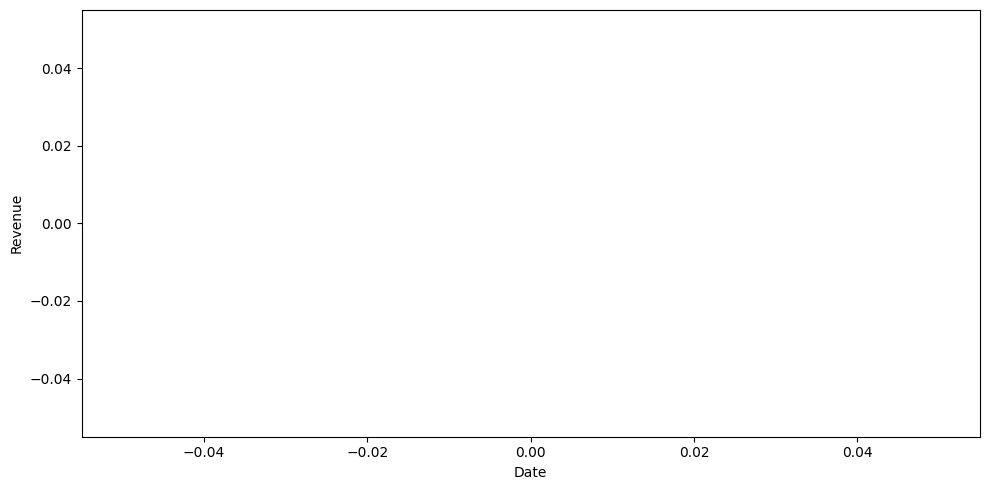

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype('int')
sns.lineplot(data = tesla_revenue, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

### Beneficio bruto anual

TypeError: datetime64 type does not support sum operations

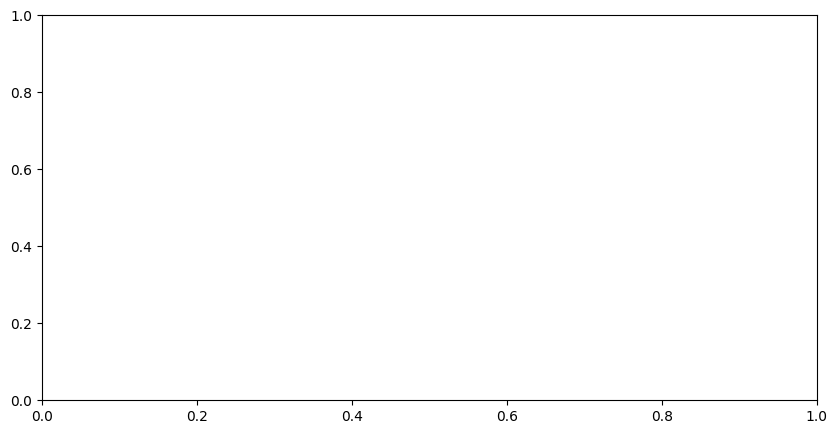

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue_yearly = tesla_revenue.groupby(tesla_revenue["Date"].dt.year).sum().reset_index()

sns.barplot(data = tesla_revenue_yearly[tesla_revenue_yearly["Date"] < 2023], x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

### Beneficio bruto mensual

AttributeError: Can only use .dt accessor with datetimelike values

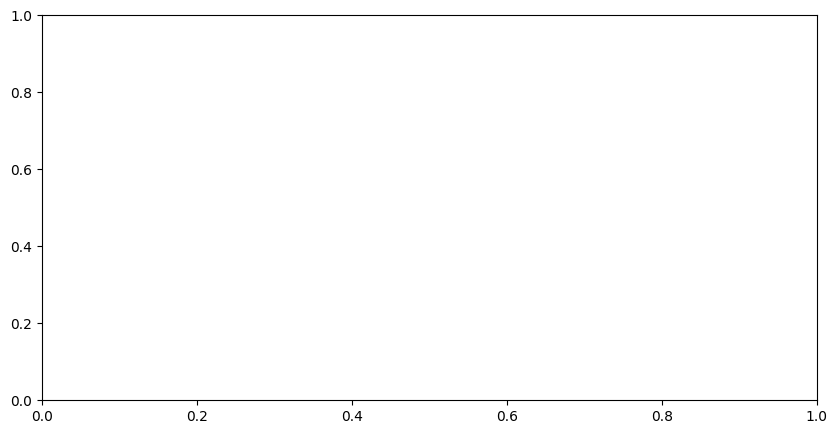

In [27]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue_monthly = tesla_revenue.groupby(tesla_revenue["Date"].dt.month).sum().reset_index()

sns.barplot(data = tesla_revenue_monthly, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()